# Exercício 2 - Template Matching

**Vítor Gabriel Reis Caitité - 2016111849**



## Descrição da atividade

O aluno deverá programar o método do Template Matching e deverá tentar encontrar
as placas 1 e 2 fornecidas em uma na figura geral também fornecida. O aluno deverá implementar diferentes métricas e avaliar o desempenho de cada uma.
É aconselhavel que o aluno ao carregar a imagem a transforme em escala de cinzas antes
de aplicar o método.

## Leitura das Imagens

In [182]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
from PIL import Image, ImageOps
from skimage import color
from skimage import io
from scipy.linalg import sqrtm

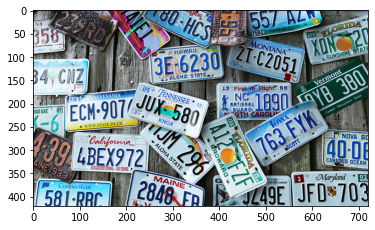

In [167]:
original_image = mpimg.imread('placas.jpg')
plate1 = mpimg.imread('placa_1.jpg')
plate2 = mpimg.imread('placa_2.jpg')

plt.imshow(original_image)

Essa primeira figura corresponde a imagem onde buscamos encntrar as placas 1 e 2 mostradas abaixo.

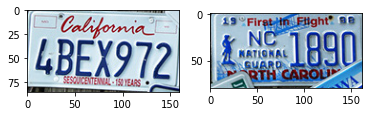

In [168]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(plate1)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(plate2)

As dimensões de cada uma das imagens está mostrada abaixo:

In [169]:
print("Dimensão figura original: " + str(original_image.shape))
print("Dimensão figura placa 1: " + str(plate1.shape))
print("Dimensão figura placa 2: " + str(plate2.shape))

Dimensão figura original: (420, 720, 3)
Dimensão figura placa 1: (86, 160, 3)
Dimensão figura placa 2: (80, 162, 3)


## Conversão das imagens para grayscale

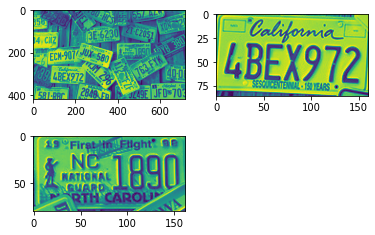

In [170]:
original_image = color.rgb2gray(original_image)
plate1 = color.rgb2gray(plate1)
plate2 = color.rgb2gray(plate2)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(original_image)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(plate1)
ax2 = fig.add_subplot(2,2,3)
ax2.imshow(plate2)


Como pode ser visto abaixo, agora temos não mais 3 matrizes de pixels (RGB) mas sim apenas uma matriz para cada uma das imagens. O objetivo disso é facilitar as operações realizadas a seguir.

In [171]:
print("Dimensão figura original: " + str(original_image.shape))
print("Dimensão figura placa 1: " + str(plate1.shape))
print("Dimensão figura placa 2: " + str(plate2.shape))

Dimensão figura original: (420, 720)
Dimensão figura placa 1: (86, 160)
Dimensão figura placa 2: (80, 162)


## Aplicando Template Matching para encontra a placa 1 na imagem original

In [172]:
nl = original_image.shape[0] - plate1.shape[0]
nc = original_image.shape[1] - plate1.shape[1]
print(nl)
print(nc)

334
560


A distância de Minkowski é uma métrica em um espaço vetorial normado, a qual pode ser considerada como uma generalização de ambas as distâncias euclidiana e Manhattan, apresentadas abaixo.

![roc.svg](min.png)


- p=1 -> Distância Manhattan.
- p=2 -> Distância Euclidiana


### Distância Manhattan

In [173]:
m = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        m[line, column] = np.sum(abs(original_image[line:line+plate1.shape[0], column:column+plate1.shape[1]] - plate1))

print(m.shape)

(334, 560)


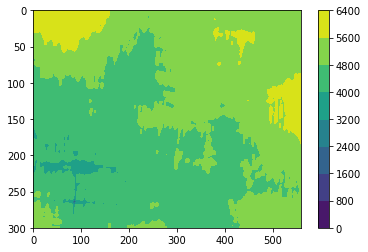

In [174]:
plt.contourf(m)
plt.ylim([300, 0])
plt.colorbar()

In [175]:
idy,idx = np.where(m == m.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[86] , [264]


Na imagem acima pode-se perceber que existe um ponto de mínimo na coordenada (86, 264), é começando exatamente nesse ponto que supomos estar a placa procurada dentro da imagem original. Desenhando assim um retângulo centrado nesse ponto podemos obter o retultado abaixo.

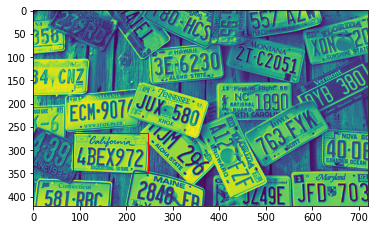

In [176]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),160,86, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

### Distância Euclidiana

In [197]:
d = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        d[line, column] = np.sum(abs(original_image[line:line+plate1.shape[0], column:column+plate1.shape[1]] - plate1)**2)**0.5

print(d.shape)

(334, 560)


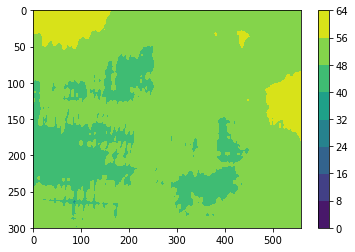

In [198]:
plt.contourf(d)
plt.ylim([300, 0])
plt.colorbar()

In [199]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[86] , [264]


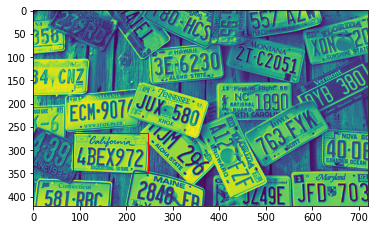

In [200]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),160,86, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

### Distância Mahalanobis

A distância de Mahalanobis entre dois pontos u e v é (u-v)(1/V)(u-v)^T onde (1/V) é a covariância inversa. 

In [ ]:
from scipy.spatial.distance import cdist
cov = np.cov(plate1)

d = np.zeros((nl, nc))
for l in range(0, nl):
    l_end = l+plate1.shape[0]
    for c in range(0, nc-1):
        c_end = c+plate1.shape[1]
        d[l,c] = np.sum(cdist(plate1,original_image[l:l_end, c:c_end],"mahalanobis", cov))


In [220]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557 557
 557 557 557 557 557 557 5

ValueError: cannot reshape array of size 1360 into shape (2,2)

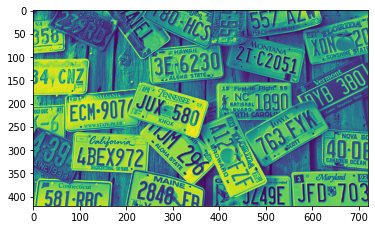

In [219]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),160,86, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

## Aplicando Template Matching para encontra a placa 2 na imagem original


In [206]:
nl = original_image.shape[0] - plate2.shape[0]
nc = original_image.shape[1] - plate2.shape[1]
print(nl)
print(nc)

340
558


### Distância Manhattan

In [207]:
m = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        m[line, column] = np.sum(abs(original_image[line:line+plate2.shape[0], column:column+plate2.shape[1]] - plate2))

print(m.shape)

(340, 558)


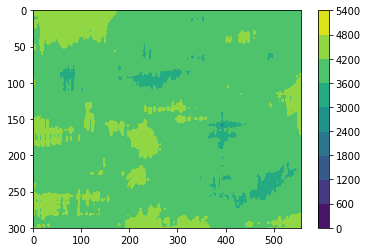

In [208]:
plt.contourf(m)
plt.ylim([300, 0])
plt.colorbar()

In [209]:
idy,idx = np.where(m == m.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[393] , [158]


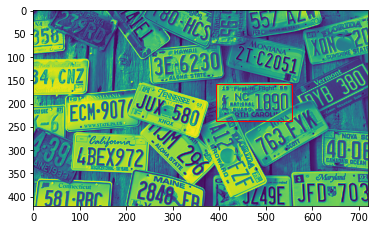

In [210]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),162,80, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

### Distância Euclidiana

In [211]:
d = np.zeros((nl, nc))
for line in range(0, nl):
    for column in range(0, nc):
        d[line, column] = np.sum(abs(original_image[line:line+plate2.shape[0], column:column+plate2.shape[1]] - plate2)**2)**0.5

print(d.shape)

(340, 558)


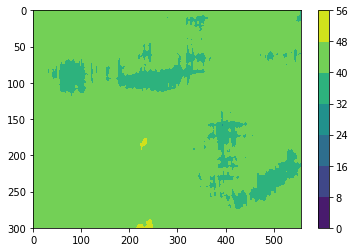

In [212]:
plt.contourf(d)
plt.ylim([300, 0])
plt.colorbar()

In [213]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[393] , [158]


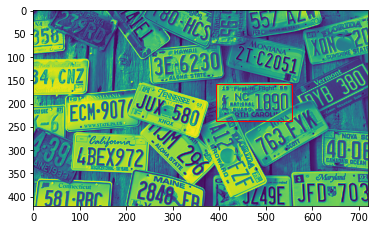

In [214]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),162,80, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

### Distância Mahalanobis

A distância de Mahalanobis entre dois pontos u e v é (u-v)(1/V)(u-v)^T onde (1/V) é a covariância inversa.

In [ ]:
cov = np.cov(plate2)

d = np.zeros((nl, nc))
for l in range(0, nl):
    l_end = l+plate2.shape[0]
    for c in range(0, nc):
        c_end = c+plate2.shape[1]
        d[l,c] = np.sum(cdist(plate2, original_image[l:l_end, c:c_end],"mahalanobis", cov))


In [215]:
idy,idx = np.where(d == d.min())
print("Coordenadas ponto de min:" + str(idx) + " , " + str(idy))

Coordenadas ponto de min:[393] , [158]


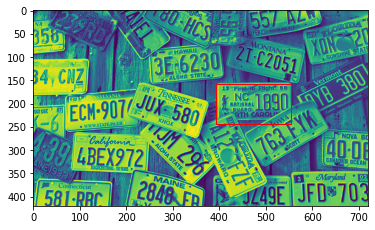

In [216]:
figure, ax = plt.subplots(1)
rect = patches.Rectangle((idx,idy),160,86, edgecolor='r', facecolor="none")

ax.imshow(original_image)
ax.add_patch(rect)

# Conclusão

Com esse trabalho pode-se estudar mais sobre as metricas mostradas durante a cisciplina e verificar a aplicação das mesmas na prática.

Todas as métricas possibilitaram alcançar o resultado esperado, contudo pôde-se observar que houve um esforço computacional muito maior ao tentar resolver o problema utilizando a distância de Mahalanobis. Isso se deve principalmente as operações de matrizes e cálculo da matriz de covariâncias inerentes a métrica.

Com isso, pode-se concluir que a escolha da métrica é uma escolha essencial para aplicação de template matching a diferentes problemas. No caso estudado como todas as três métricas aplicadas funcionaram bem, a melhor escolha a se utilizar seria a distância de Manhattan, devido ao fato de ela requisitar menor esforço computacional. 